In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import annModels as am

In [12]:
file_path = '../../data/data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
#df = df.dropna()

df = df[df['volatility_forcast'] <= 3]
df = df[df['volatility'] <= 3]

df.head()

,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,volatility,volatility_forcast,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang
0,2003-01-03,1.62,182.6,4.05,909.03,911.25,903.07,908.59,908.59,1130800000,...,0.9058,2.5512,-0.0005,0.0116,0.0002,0.0182,0.0069,0.0064,0.0054,0.0090
1,2003-01-06,1.63,182.6,4.09,908.59,931.77,908.59,929.01,929.01,1435900000,...,2.5512,1.1827,0.0222,0.0112,0.0003,0.0267,0.0086,0.0112,0.0151,0.0252
2,2003-01-07,1.62,182.6,4.04,929.01,930.81,919.93,922.93,922.93,1545200000,...,1.1827,1.6085,-0.0066,0.0122,0.0003,0.0376,0.0070,0.0072,0.0071,0.0118
3,2003-01-08,1.71,182.6,4.00,922.93,922.93,908.32,909.93,909.93,1467600000,...,1.6085,2.0199,-0.0142,0.0119,0.0004,0.0512,0.0053,0.0070,0.0096,0.0160
4,2003-01-09,1.78,182.6,4.19,909.93,928.31,909.93,927.57,927.57,1560300000,...,2.0199,1.6597,0.0192,0.0121,0.0004,0.0675,0.0040,0.0076,0.0120,0.0200


In [13]:
target = 'volatility_forcast'
date='Date'

df=df.drop(columns=[date])

X = df.drop(columns=[target])
y = df[target]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(3999, 22)
(1000, 22)


In [16]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)

X_test  = X_test.to_numpy()
y_test  = y_test.to_numpy().reshape(-1, 1)

In [17]:
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [18]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

mlp = am.MLP(n_input=22, n_hidden1=64, n_hidden2=32, n_output=1)
epochs = 5000
learning_rate = 0.001

#Training
history = mlp.train(X_train_normalized, y_train, epochs, learning_rate)

# Predict
train_preds = mlp.forward(X_train_normalized)
y_pred = mlp.forward(X_test_normalized)

# Losses
final_train_loss = np.mean((y_train - train_preds)**2)
final_test_loss  = np.mean((y_test  - y_pred)**2)

print("\nFinal Training Loss:", final_train_loss)
print("Final Test Loss:", final_test_loss)
print("Test Predictions:\n", y_pred)

Epoch 0, Loss: 6.0587
Epoch 1000, Loss: 0.2873
Epoch 2000, Loss: 0.2511
Epoch 3000, Loss: 0.2340
Epoch 4000, Loss: 0.2244

Final Training Loss: 0.21795910997318457
Final Test Loss: 0.21689140499529327
Test Predictions:
 [[1.14120063]
 [0.69939455]
 [0.83732638]
 [0.88953489]
 [0.92259328]
 [0.89481752]
 [1.1498389 ]
 [0.81910644]
 [0.98645482]
 [1.36805316]
 [0.55720963]
 [0.91097583]
 [0.71497514]
 [1.07904177]
 [1.00929177]
 [1.03815895]
 [0.76720135]
 [1.34516019]
 [0.93316274]
 [0.83851098]
 [1.00491817]
 [0.77189069]
 [1.75106388]
 [0.90222815]
 [0.70439607]
 [0.9656921 ]
 [0.46247875]
 [0.80190143]
 [0.844939  ]
 [0.80881271]
 [0.94199966]
 [1.08398563]
 [1.66481369]
 [1.26030324]
 [0.80854944]
 [0.57380572]
 [0.44782656]
 [1.20410395]
 [1.48154112]
 [0.90285266]
 [0.77771917]
 [0.95895372]
 [0.95332208]
 [0.88301439]
 [0.76479331]
 [0.99687698]
 [1.40206733]
 [0.97118712]
 [1.2177034 ]
 [1.21854358]
 [1.65950722]
 [0.4564008 ]
 [0.69405223]
 [1.40943643]
 [1.70964307]
 [0.451016

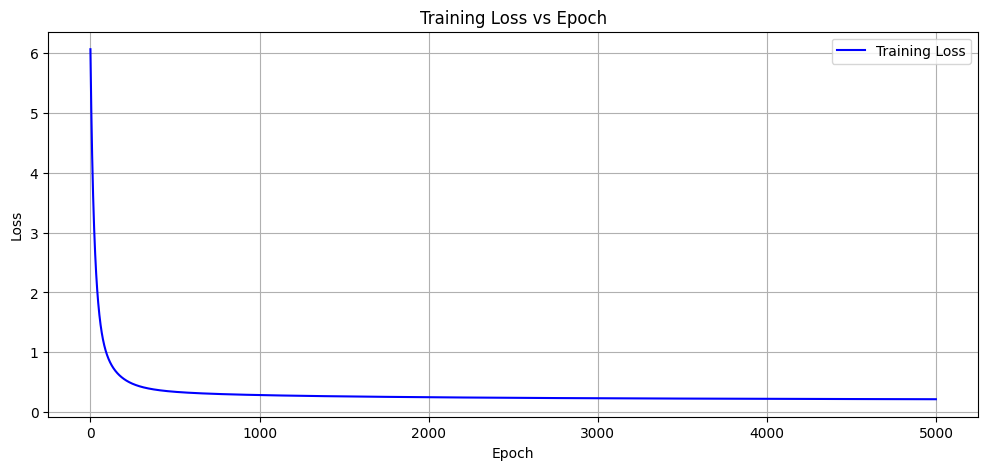

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(history, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

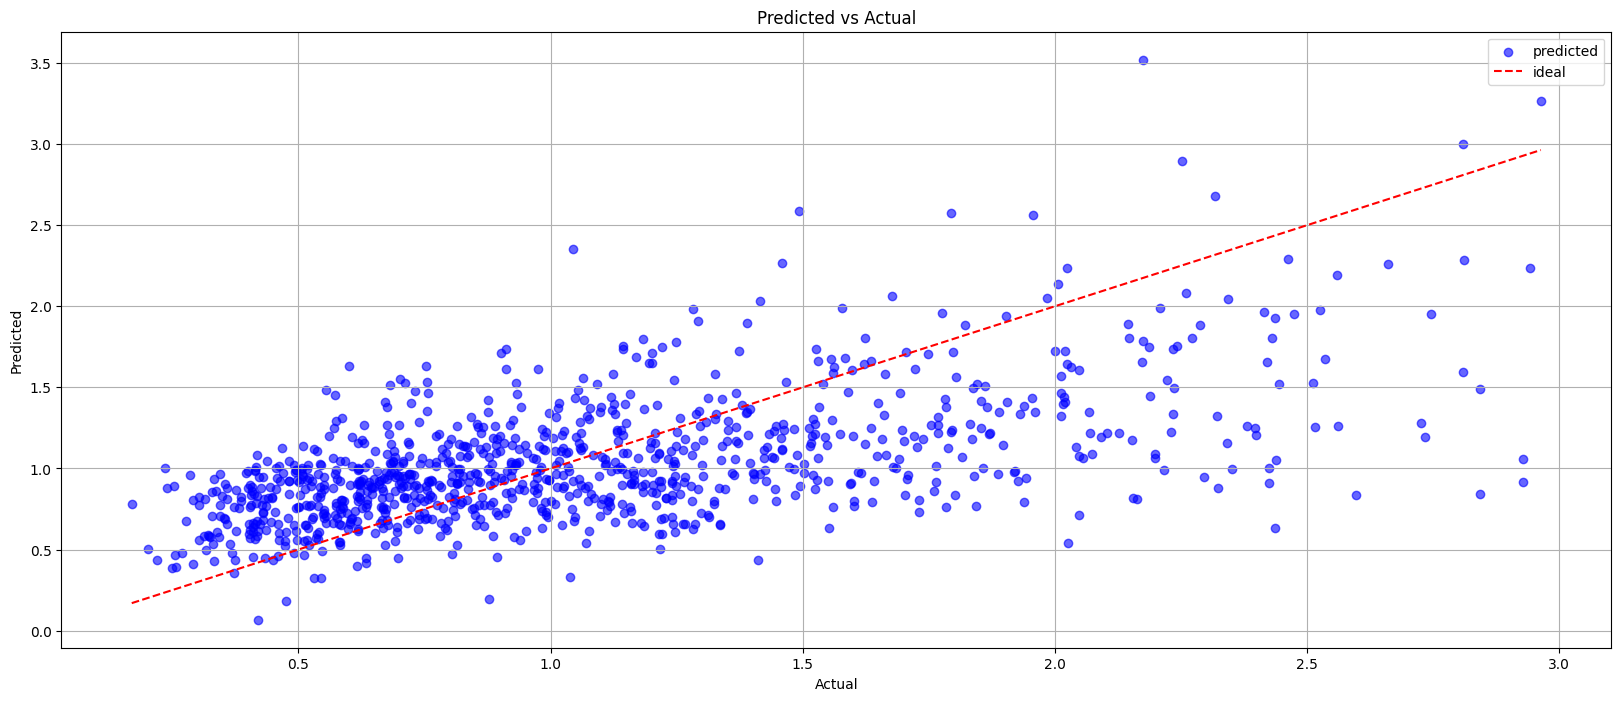

In [20]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="ideal")
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()
